In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import shap
from matplotlib.gridspec import GridSpec 
from sklearn.ensemble import  ExtraTreesRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score



In [10]:
# 读取不同特性的数据
df_AD = pd.read_csv(r'F:\codes\00-WORK\work-1\01-myself\01-predict\01-Pre_AD\Catboost\3fold\AD-平行实验-3.csv')
df_TC = pd.read_csv(r'F:\codes\00-WORK\work-1\01-myself\01-predict\01-Pre_TC\Catboost\3fold\TC-平行实验-3.csv')
df_S_TC = pd.read_csv(r'F:\codes\00-WORK\work-1\01-myself\01-predict\01-Pre_S_TC\Catboost\3fold\S_TC-平行实验-3.csv')
df_CS = pd.read_csv(r'F:\codes\00-WORK\work-1\01-myself\01-predict\01-Pre_CS\catboost\3fold\CS-平行实验-3.csv')
df_S_CS = pd.read_csv(r'F:\codes\00-WORK\work-1\01-myself\01-predict\01-Pre_S_CS\Catboost\3fold\S_CS-平行实验-3.csv')


In [11]:
# 进行行合并（纵向拼接）
df_merged = pd.concat([df_AD, df_TC, df_S_TC, df_CS, df_S_CS], ignore_index=True)
df_merged

,Feature,Seed,Fold,R²,MAE,MSE,RMSE,RSE
0,AD,0,1,0.748578,0.052884,0.006148,0.078410,0.501420
1,AD,0,2,0.784877,0.057385,0.007306,0.085478,0.463814
2,AD,0,3,0.752865,0.053617,0.008173,0.090405,0.497126
3,AD,1,1,0.847318,0.046571,0.004698,0.068541,0.390746
4,AD,1,2,0.811092,0.045902,0.006022,0.077602,0.434635
...,...,...,...,...,...,...,...,...
1495,S_CS,98,2,0.704391,0.069995,0.008727,0.093419,0.543700
1496,S_CS,98,3,0.804084,0.062307,0.009518,0.097558,0.442624
1497,S_CS,99,1,0.800247,0.064158,0.008391,0.091602,0.446938
1498,S_CS,99,2,0.551374,0.076397,0.011035,0.105047,0.669795


In [12]:

# 按照"特征"列分组并计算均值
mean_df = df_merged.groupby("Feature").mean().iloc[:, -8:]

# 保留两位小数
mean_df = mean_df.round(2)

# 保存结果到xlsx文件
mean_df.to_excel(r"F:\codes\00-WORK\work-1\01-myself\00-data processing\EXCEL\mean_result-3.xlsx")
mean_df

,Seed,Fold,R²,MAE,MSE,RMSE,RSE
Feature,,,,,,,
AD,49.5,2.0,0.80,0.05,0.01,0.08,0.44
CS,49.5,2.0,0.80,0.09,0.01,0.12,0.44
S_CS,49.5,2.0,0.70,0.07,0.01,0.10,0.54
S_TC,49.5,2.0,0.86,0.08,0.02,0.12,0.37
TC,49.5,2.0,0.86,1.78,7.96,2.79,0.37


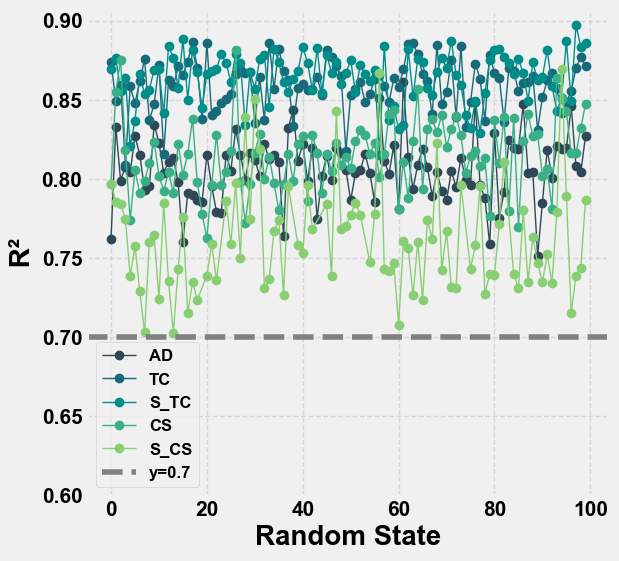

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15
plt.figure(figsize=(6, 6))

# 获取唯一的特征列表
features = df_merged["Feature"].unique()

# 自定义颜色列表
colors = ['#2E4857', '#176A7A', '#008E8A', '#39B086', '#88CF73', '#DFE662']

# 遍历不同的特征
for i, feature in enumerate(features):
    subset = df_merged[df_merged["Feature"] == feature]
    
    # 筛选出 Test R² >= 0.7 的数据
    subset_filtered = subset[subset["R²"] >= 0.7]
    
    # 计算均值
    test_r2_mean = subset_filtered.groupby("Seed")["R²"].mean()
    
    # 画折线图，设置 linewidth=1 使曲线更细
    plt.plot(test_r2_mean.index, test_r2_mean, marker='o', label=feature, color=colors[i], linewidth=1)

# 添加一条灰色的水平线，y=0.7
plt.axhline(y=0.7, color='gray', linestyle='--', label='y=0.7')

# 设置图例 & 轴标签
plt.xlabel("Random State", fontsize=20, fontweight='bold')
plt.ylabel(" R² ", fontsize=20, fontweight='bold')
plt.legend(title="", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 设置 y 轴从 0 开始
plt.ylim(bottom=0.6)

# 显示图像
plt.show()



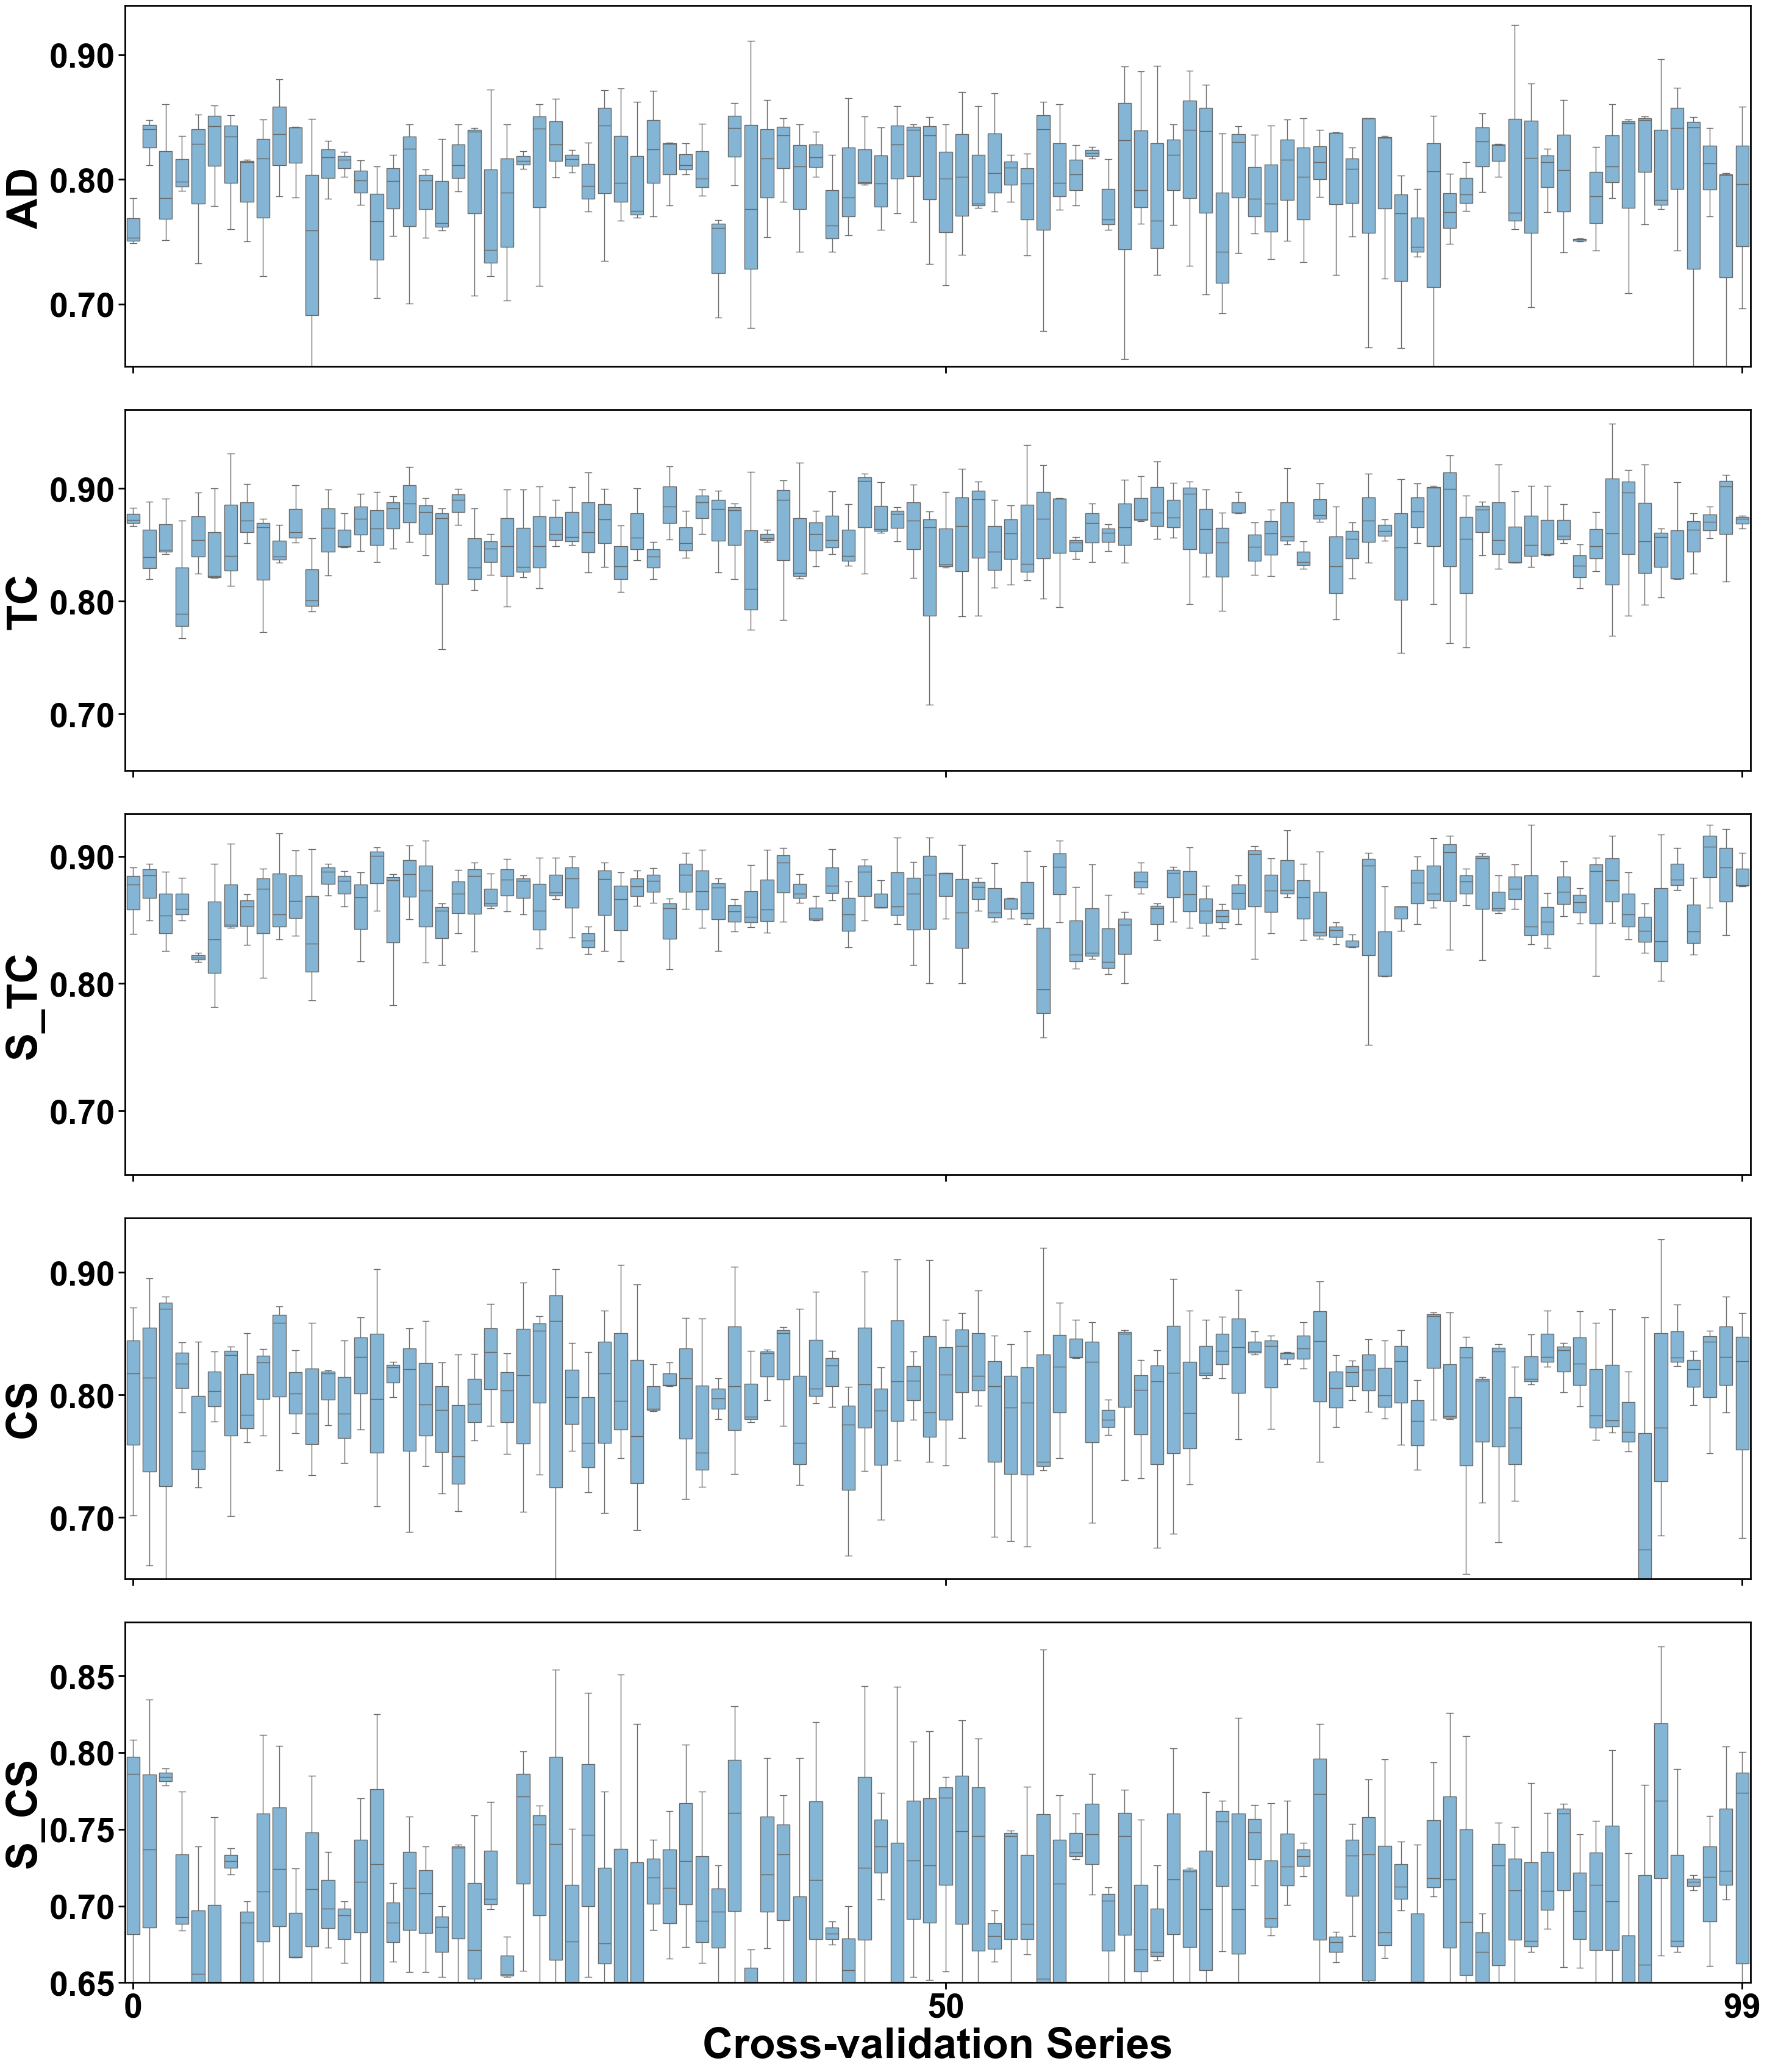

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 设置风格
plt.style.use('default')
plt.rc('font', weight='bold')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'    # 边框颜色
plt.rcParams['axes.linewidth'] = 2          # 边框线宽
plt.rc('font', family='Arial', size=40)  # 字体大小

# 格式化 y 轴刻度，保留两位小数
def format_ticks(y, _):
    return f"{y:.2f}"

# 获取唯一的特征列表
features = df_merged["Feature"].unique()

# 生成从浅到深的颜色列表
light_colors = sns.light_palette("#0081cf", n_colors=5)
lighter_color = light_colors[2]

# 创建子图
fig, axes = plt.subplots(5, 1, figsize=(30, 35))

# 字母标签列表
labels = ['a', 'b', 'c', 'd', 'e']

# 遍历不同的特征和子图
for i, (feature, label) in enumerate(zip(features, labels)):
    ax = axes[i]
    subset_filtered = df_merged[df_merged["Feature"] == feature]
    subset_filtered = subset_filtered[subset_filtered["R²"] >= 0.55]

    # 箱线图
    sns.boxplot(x="Seed", y="R²", data=subset_filtered, ax=ax, color=lighter_color, showfliers=False)

    # 坐标轴
    ax.set_xlabel("Cross-validation Series", fontsize=50, weight='bold')
    ax.set_ylabel(f"{feature}  ", fontsize=50, weight='bold')
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))    
    ax.set_ylim(bottom=0.65)
    ax.set_xticks([0, 50, 99])

    # 隐藏除最后一个以外的 x 轴标签
    if i != 4:  
        ax.set_xticklabels([])
        ax.set_xlabel("")

    ax.tick_params(which='major', width=2, length=8, direction='out', color='black')

    # 添加字母标签
    # ax.text(-0.1, 1.03, f'({label})', transform=ax.transAxes,
    #         fontsize=50, fontweight='bold', va='top', ha='right')  # <-- 添加标签

# 最后一个子图显示 x 轴刻度
axes[-1].set_xticks([0, 50, 99])

# 调整布局并保存
plt.tight_layout()
plt.savefig(r"F:\codes\00-WORK\work-1\01-myself\00-data processing\00-figure\平行实验-3-箱线图.jpg", dpi=600, bbox_inches='tight')
plt.show()


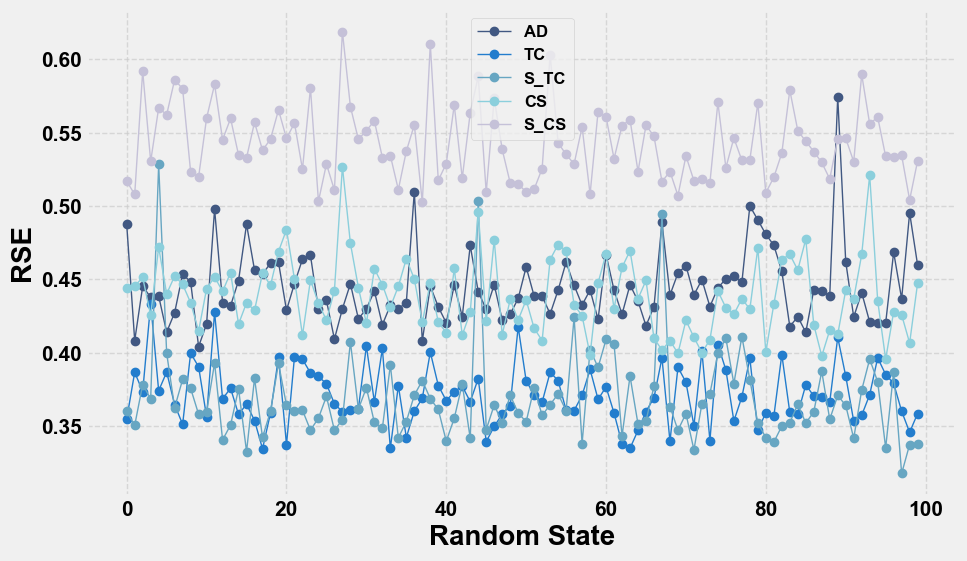

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10, 6))

# 获取唯一的特征列表
features = df_merged["Feature"].unique()

# 自定义颜色列表
colors = ["#415882", "#237dcd", "#67A6C2", "#8BCFDC",  "#C5C1D8", '#DFE662']

# 遍历不同的特征
for i, feature in enumerate(features):
    subset = df_merged[df_merged["Feature"] == feature]
    
    # 计算均值
    test_mae_mean = subset.groupby("Seed")["RSE"].mean()
    
    # 画折线图，设置 linewidth=1 使曲线更细
    plt.plot(test_mae_mean.index, test_mae_mean, marker='o', label=feature, color=colors[i], linewidth=1)

# 设置图例 & 轴标签
plt.xlabel("Random State", fontsize=20, fontweight='bold')
plt.ylabel("RSE", fontsize=20, fontweight='bold')
plt.legend(title="", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图像
plt.show()

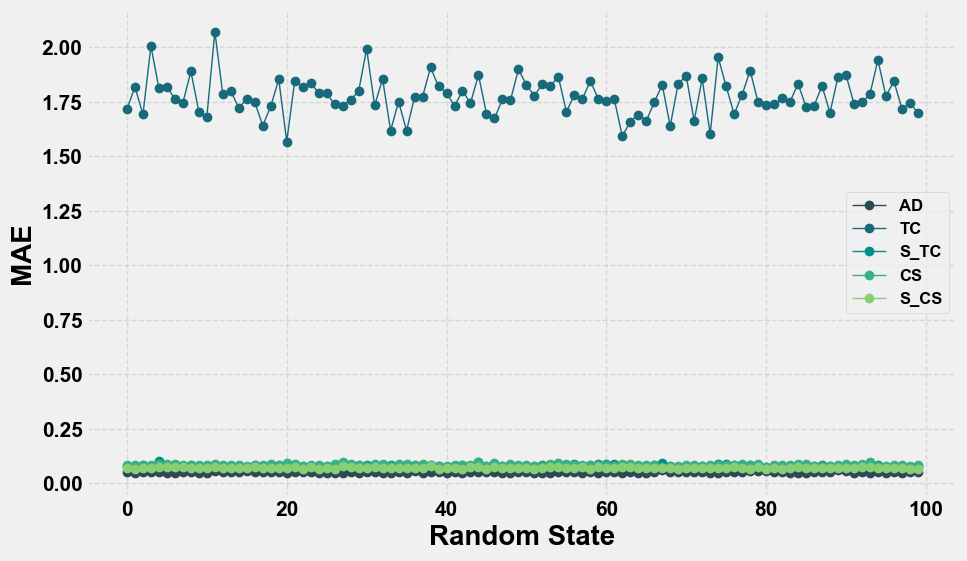

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10, 6))

# 获取唯一的特征列表
features = df_merged["Feature"].unique()

# 自定义颜色列表
colors = ['#2E4857', '#176A7A', '#008E8A', '#39B086', '#88CF73', '#DFE662']

# 遍历不同的特征
for i, feature in enumerate(features):
    subset = df_merged[df_merged["Feature"] == feature]
    
    # 计算均值
    test_mae_mean = subset.groupby("Seed")["MAE"].mean()
    
    # 画折线图，设置 linewidth=1 使曲线更细
    plt.plot(test_mae_mean.index, test_mae_mean, marker='o', label=feature, color=colors[i], linewidth=1)

# 设置图例 & 轴标签
plt.xlabel("Random State", fontsize=20, fontweight='bold')
plt.ylabel("MAE", fontsize=20, fontweight='bold')
plt.legend(title="", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图像
plt.show()
